<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [76]:
!pip install -U nltk -qq
!pip install -U spacy -qq
!python -m spacy download en_core_web_sm -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 106.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import sys
basepath = '/content/drive/MyDrive/data'
sys.path.append('/content/drive/MyDrive/Applied NLP/Codes/Custom py classes')

In [79]:
import pandas as pd
spam_df = pd.read_csv("/content/drive/MyDrive/Applied NLP/Codes/spam.csv", encoding='latin-1')
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [80]:
spam_df = spam_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [81]:
spam_df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
hamCount = spam_df[spam_df['label'] == 'ham'].shape[0]
spamCount = spam_df[spam_df['label'] == 'spam'].shape[0]
percentageham = (hamCount / spam_df.shape[0]) * 100
percentagespam = (spamCount / spam_df.shape[0]) * 100
print(f"Percentage of ham: {percentageham}")
print(f"Percentage of spam: {percentagespam}")

Percentage of ham: 86.59368269921033
Percentage of spam: 13.406317300789663


In [82]:
spam_df.shape

(5572, 2)

In [83]:
spam_df["label"].isna().sum()

0

In [84]:
spam_df["message"].isna().sum()

0

In [85]:
spam_df["label"].value_counts()

,count
label,
ham,4825
spam,747


In [86]:
spam_df["label"] = spam_df["label"].map({'ham': 0, 'spam': 1})

In [87]:
spam_df["label"].value_counts()

,count
label,
0,4825
1,747


# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

**Answer: For imbalanced datasets, accuracy is not a good metric.
We should use metrics like precision, recall, F1-score, or AUC.
I would choose F1-score in this case.It considers both precision and recall, resulting in a fair assessment of a model's performance. The F1 score is a more reliable evaluation statistic, especially when the minority class is of interest. Despite the class imbalance, the F1 score accurately represents the model's performance by taking into account both precision and recall.**


# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

5. Make sure to modify the plot learning curve code to incorporate apprioparite metric. The default is accuracy which may noit be a good choice.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)






# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. No need to submit the pdf version.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

In [88]:
import sklearn
from sklearn.model_selection import train_test_split

(train_df, test_df) = train_test_split(spam_df, test_size=0.4, random_state=42)

In [89]:
small_train_df = train_df.sample(frac=0.1, random_state=42)
small_test_df = test_df.sample(frac=0.1, random_state=42)

In [90]:
X_train = small_train_df['message'].values
X_test = small_test_df['message'].values
y_train = small_train_df['label'].values
y_test = small_test_df['label'].values

print(f'X_train: {X_train.shape} y_train: {y_train.shape}')
print(f'X_test: {X_test.shape} y_test: {y_test.shape}')

X_train: (334,) y_train: (334,)
X_test: (223,) y_test: (223,)


**PIPELINE 1 - TFIDF Sparse Embeddings**

*Since the dataset is small. I am not pickling the cleaned data for reusability.But in cases where the datasets are large it is ideal to pickle the cleaned data and the fit model for reusability.*

In [91]:
import CustomPreprocessorSpacy as cp
from FeaturizerSpacy import ManualFeatures
from plot_learning_curve import plot_learning_curve

In [92]:
cp.SpacyPreprocessor

CustomPreprocessorSpacy.SpacyPreprocessor

In [93]:
X_train_cleaned = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 100).transform(X_train)

/content/drive/MyDrive/Applied NLP/Codes/Custom py classes/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [94]:
X_test_cleaned = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 100).transform(X_test)

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
classifier_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
    ('classifier', LogisticRegression(max_iter=10000)),])

In [96]:
param_grid_classifier_1 = {'vectorizer__max_features': [1000, 2000, 5000],
                           'vectorizer__min_df': [1, 5, 10],
                           'vectorizer__max_df': [0.5, 0.75, 1.0],
                           'vectorizer__ngram_range': [(1, 1), (1, 2)],
                           'classifier__C': [1, 10, 100,]
                           }

In [97]:
grid_classifier_1 = GridSearchCV(
    estimator=classifier_1, param_grid=param_grid_classifier_1, cv=5,scoring='f1', n_jobs=-1)

In [98]:
grid_classifier_1.fit(X_train_cleaned, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(token_pattern='[\\S]+')),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 100],
                         'vectorizer__max_df': [0.5, 0.75, 1.0],
                         'vectorizer__max_features': [1000, 2000, 5000],
                         'vectorizer__min_df': [1, 5, 10],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1')

In [99]:
print(f'Best cross-validation score: {grid_classifier_1.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_1.best_params_)
print("\nBest estimator: ", grid_classifier_1.best_estimator_)

Best cross-validation score: 0.74

Best parameters:  {'classifier__C': 100, 'vectorizer__max_df': 0.5, 'vectorizer__max_features': 1000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 2)}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.5, max_features=1000,
                                 ngram_range=(1, 2), token_pattern='[\\S]+')),
                ('classifier', LogisticRegression(C=100, max_iter=10000))])


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

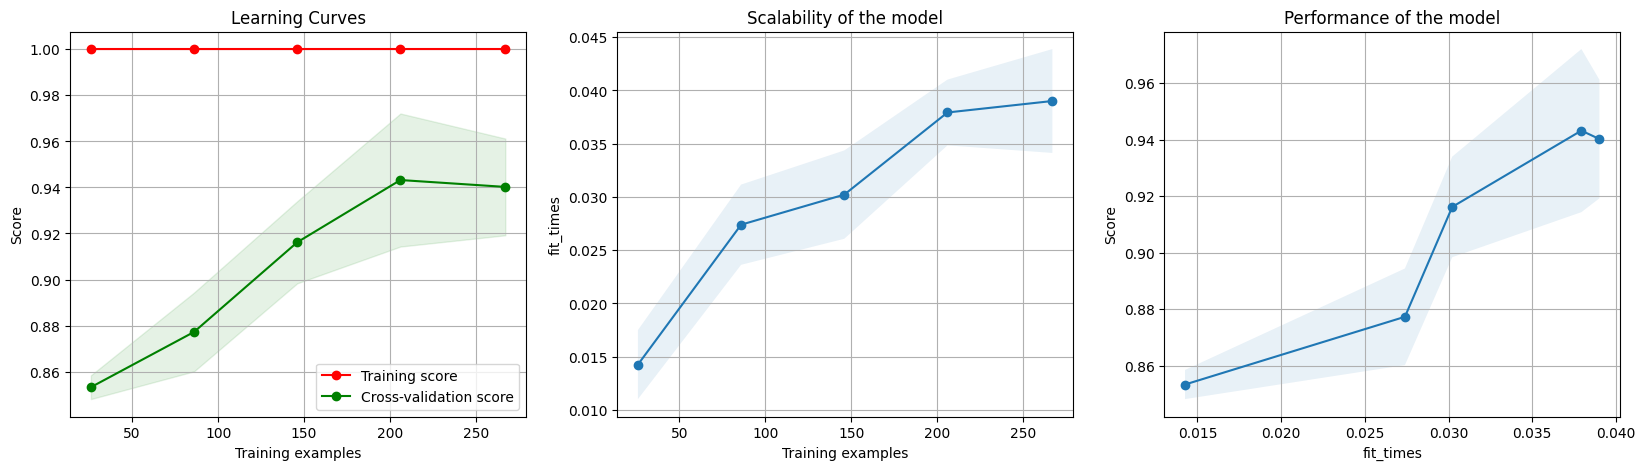

In [100]:
# plot learning curces
plot_learning_curve(grid_classifier_1.best_estimator_, 'Learning Curves',
                    X_train_cleaned, y_train, n_jobs=-1)

**We can see that this pipeline is creating an overfitting model. It is a good sign and the pipeline is a valid one.**

In [101]:
# let's check the train scores
print(grid_classifier_1.best_estimator_.score(
    X_train_cleaned, y_train))

# let's check the cross validation score
print(grid_classifier_1.best_score_)

1.0
0.7428804855275444


In [102]:
# Final Pipeline
def final_pipeline(text):
    predictions = grid_classifier_1.best_estimator_.predict(X_test_cleaned)
    return predictions

In [103]:
y_test_pred = final_pipeline(X_test_cleaned)

In [104]:
from sklearn.metrics import classification_report
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98       196
           1       0.85      0.85      0.85        27

    accuracy                           0.96       223
   macro avg       0.92      0.92      0.92       223
weighted avg       0.96      0.96      0.96       223



**PIPELINE 2 - Feature engineering**

In [105]:
X_train_cleaned_features = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_train)

/content/drive/MyDrive/Applied NLP/Codes/Custom py classes/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [106]:
X_test_cleaned_features = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_test)

In [107]:
ManualFeatures

FeaturizerSpacy.ManualFeatures

In [108]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm', batch_size = 200)

In [109]:
X_train_features, feature_names = featurizer.fit_transform(X_train_cleaned_features)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [110]:
classifier_2 = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000)),
])

In [111]:
param_grid_classifier_2 = {'classifier__C': [100,1000,100000]}

In [112]:
grid_classifier_2 = GridSearchCV(estimator=classifier_2,
                                 param_grid=param_grid_classifier_2,
                                 cv=5,
                                 scoring='f1')

In [113]:
# Fit the model on training data
grid_classifier_2.fit(X_train_features, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [100, 1000, 100000]}, scoring='f1')

In [114]:
print(f'Best cross-validation score: {grid_classifier_2.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_2.best_params_)
print("\nBest estimator: ", grid_classifier_2.best_estimator_)

Best cross-validation score: 0.87

Best parameters:  {'classifier__C': 100}

Best estimator:  Pipeline(steps=[('classifier', LogisticRegression(C=100, max_iter=10000))])


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

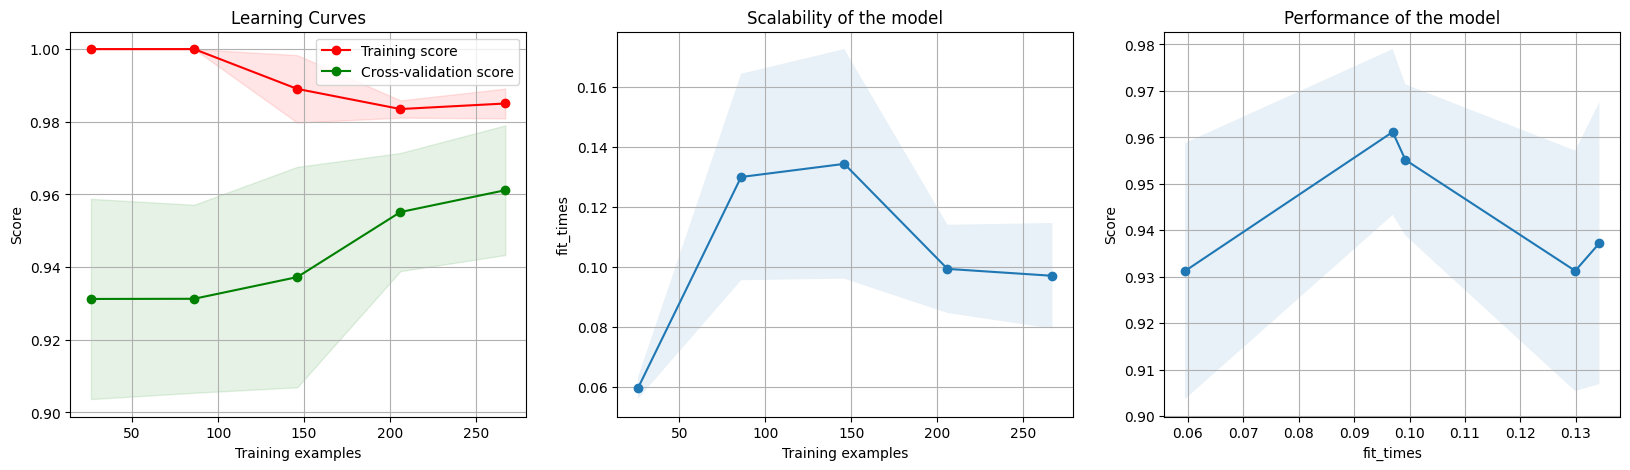

In [115]:
plot_learning_curve(grid_classifier_2.best_estimator_, 'Learning Curves',
                    X_train_features, y_train, n_jobs=-1)


This pipeline needs to be discarded as the model is clearly underfitting. So there is no use of taking more samples and training the model again.

In [116]:
# let's check the train scores
print(grid_classifier_2.best_estimator_.score(X_train_features, y_train))

# let's check the cross validation score
print(grid_classifier_2.best_score_)

0.9820359281437125
0.8656090314913845


In [117]:
def final_pipeline(text):
    features, feature_names = featurizer.fit_transform(X_test_cleaned_features)
    predictions = grid_classifier_2.best_estimator_.predict(features)
    return predictions

In [118]:
y_test_pred = final_pipeline(X_test)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [119]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98       196
           1       0.81      0.93      0.86        27

    accuracy                           0.96       223
   macro avg       0.90      0.95      0.92       223
weighted avg       0.97      0.96      0.97       223



**PIPELINE 3 - TFIDF+FeatureEngineering**

In [120]:
X_train_final = pd.concat((pd.DataFrame(X_train_cleaned, columns=['cleaned_text']),
                           pd.DataFrame(X_train_features, columns=feature_names)), axis=1)

In [121]:
X_train_final.head()

,cleaned_text,count_words,count_characters,count_characters_no_space,avg_word_length,count_numbers,count_sentences,noun_count,aux_count,verb_count,adj_count,ner
0,get video tape pple type message lor u free wa...,34.0,153.0,120.0,3.428571,2.0,4.0,12.0,0.0,6.0,2.0,2.0
1,okie,1.0,4.0,4.0,2.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,super msg da:)nalla timing,4.0,27.0,24.0,4.800000,0.0,1.0,3.0,0.0,1.0,0.0,0.0
3,wish,6.0,25.0,20.0,2.857143,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,r meet 4 dinner tonight,7.0,36.0,30.0,3.750000,1.0,1.0,3.0,0.0,1.0,0.0,2.0


In [122]:
subset = X_train_final[0:10]

In [123]:
from sklearn.base import TransformerMixin, BaseEstimator
from scipy.sparse import csr_matrix
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)

In [124]:
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=5)), ])

In [125]:
from sklearn.compose import ColumnTransformer
combined_features = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'cleaned_text'),
    ], remainder=sparse_features
)

In [126]:
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(max_iter=10000)),
                         ])

In [127]:
param_grid_classifier_3 = {'combined_features__tfidf__tfidf__max_features': [500, 1000, 2000],
                            'combined_features__tfidf__tfidf__ngram_range': [(1, 1), (1, 2)],
                            'combined_features__tfidf__tfidf__min_df': [1, 5, 10],
                            'combined_features__tfidf__tfidf__max_df': [0.5, 0.75, 1.0],

                           'classifier__C': [0.1, 1, 10]
                           }

In [128]:
grid_classifier_3 = GridSearchCV(estimator=classifier_3,
                                 param_grid=param_grid_classifier_3,
                                 cv=5,scoring='f1')

In [129]:
grid_classifier_3.fit(X_train_final, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('combined_features',
                                        ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                                                     SparseTransformer())]),
                                                          transformers=[('tfidf',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          TfidfVectorizer(max_features=5))]),
                                                                         'cleaned_text')])),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'combined_features__tfidf__tfidf__max_df': [0.5, 0.75,
                                                                     1.0],
                         'combined_features__tfidf__tfidf__max_features': [500,
                                                                           1000,
                                                                           2000],
                         'combined_features__tfidf__tfidf__min_df': [1, 5, 10],
                         'combined_features__tfidf__tfidf__ngram_range': [(1,
                                                                           1),
                                                                          (1,
                                                                           2)]},
             scoring='f1')

In [130]:
print(
    "Best cross-validation score: {:.2f}".format(grid_classifier_3.best_score_))
print("\nBest parameters: ", grid_classifier_3.best_params_)
print("\nBest estimator: ", grid_classifier_3.best_estimator_)

Best cross-validation score: 0.92

Best parameters:  {'classifier__C': 10, 'combined_features__tfidf__tfidf__max_df': 0.5, 'combined_features__tfidf__tfidf__max_features': 500, 'combined_features__tfidf__tfidf__min_df': 10, 'combined_features__tfidf__tfidf__ngram_range': (1, 1)}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_df=0.5,
                                                                                   max_features=500,
                                                                                   min_df=10))]),
                                                  'cleaned_text')])),
       

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

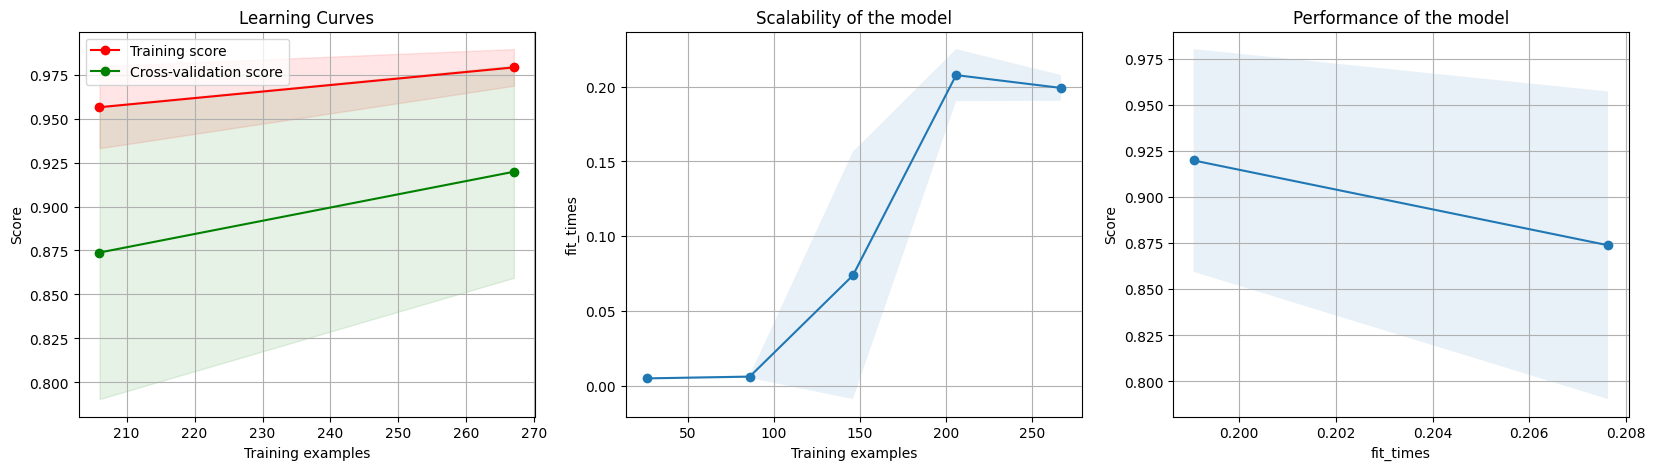

In [131]:
# plot learning curces
plot_learning_curve(grid_classifier_3.best_estimator_, 'Learning Curves',
                    X_train_final, y_train, n_jobs=-1,scoring='f1')

In [132]:
# let's check the train scores
print(grid_classifier_3.best_estimator_.score(X_train_final, y_train))

# let's check the cross validation score
print(grid_classifier_3.best_score_)

0.9940119760479041
0.9197994987468672


In [133]:
def final_pipeline(text):
    cleaned_text = X_test_cleaned
    X_features, feature_names = featurizer.fit_transform(text)
    X_final = pd.concat((pd.DataFrame(cleaned_text, columns=['cleaned_text']),
                         pd.DataFrame(X_features, columns=feature_names)), axis=1)
    best_estimator_pipeline3_round1 = grid_classifier_3.best_estimator_
    predictions = best_estimator_pipeline3_round1.predict(X_final)
    return predictions

In [134]:
y_test_pred = final_pipeline(X_test)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [135]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98       196
           1       0.81      0.96      0.88        27

    accuracy                           0.97       223
   macro avg       0.90      0.97      0.93       223
weighted avg       0.97      0.97      0.97       223



**This model is also overfitting and we can see from the plot that increasing the number of samples will give us good results.**
**Now comparing the first pipeline and the final pipeline which are overfitting,we can choose the final one since the scores of the third pipeline(0.91) is better than the first.(0.74)**